In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text
import requests
from bs4 import BeautifulSoup
import json
import re

from PIL import Image
import urllib
import os
import math

In [2]:
font_path = "C:/Users/LENOVO/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("C:/Users/LENOVO/assets/stylesheets/soc_base.mplstyle")

Scrapping Premier League Table Data from UnderStat

In [3]:
# Entering the league's  link
link = "https://understat.com/league/EPL"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the table 
strings = scripts[2].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [10]:
df = pd.DataFrame(data.values())
df = df.explode("history")
h = df.pop("history")
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(h.tolist())], axis=1)
df = df.infer_objects()

In [11]:
df.head()

,id,title,h_a,xG,xGA,npxG,npxGA,ppda,ppda_allowed,deep,...,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD
0,71,Aston Villa,a,0.488895,0.588341,0.488895,0.588341,"{'att': 152, 'def': 23}","{'att': 292, 'def': 25}",11,...,0,2,1.1567,l,2022-08-06 14:00:00,0,0,1,0,-0.099446
1,71,Aston Villa,h,2.666960,1.375070,2.666960,1.375070,"{'att': 214, 'def': 23}","{'att': 242, 'def': 13}",13,...,2,1,2.3254,w,2022-08-13 11:30:00,1,0,0,3,1.291890
2,71,Aston Villa,a,0.803828,2.911370,0.803828,2.006620,"{'att': 252, 'def': 34}","{'att': 251, 'def': 18}",3,...,1,3,0.2122,l,2022-08-20 14:00:00,0,0,1,0,-1.202792
3,71,Aston Villa,h,0.304555,0.334589,0.304555,0.334589,"{'att': 243, 'def': 18}","{'att': 351, 'def': 20}",4,...,0,1,1.1528,l,2022-08-28 13:00:00,0,0,1,0,-0.030034
4,71,Aston Villa,a,0.297168,2.799710,0.297168,2.799710,"{'att': 278, 'def': 19}","{'att': 168, 'def': 17}",3,...,1,2,0.0894,l,2022-08-31 18:30:00,0,0,1,0,-2.502542


In [12]:
table = df.groupby(['title']).agg({'wins': 'sum', 'draws': 'sum', 'loses': 'sum', 'scored': 'sum', 'missed': 'sum', 'pts': 'sum', 'xG': 'sum', 'xGA': 'sum', 'xpts': 'sum', 'npxG': 'sum', 'npxGA': 'sum', 'deep': 'sum', 'deep_allowed': 'sum'}).reset_index()
table

,title,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,npxG,npxGA,deep,deep_allowed
0,Arsenal,16,2,1,45,16,50,40.568964,16.936053,41.5604,39.807794,14.652536,212,81
1,Aston Villa,8,4,8,23,27,28,24.106359,29.380449,26.6922,22.584017,26.953369,122,125
2,Bournemouth,4,5,11,19,42,17,17.417437,34.922761,16.1389,17.417437,30.355736,101,185
3,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,26.979607,26.644590,110,177
4,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,31.628358,20.158137,176,113
5,Chelsea,8,5,7,22,21,29,26.965996,27.863868,26.9908,25.443652,27.863868,141,98
6,Crystal Palace,6,6,8,18,27,24,19.842887,30.488259,20.2243,18.176973,30.488259,90,197
7,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,19.400055,33.500953,98,157
8,Fulham,9,4,8,32,30,31,29.834054,40.533632,23.8512,24.505866,38.250118,106,153
9,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,24.880372,30.817002,121,124


In [13]:
table.head()

,title,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,npxG,npxGA,deep,deep_allowed
0,Arsenal,16,2,1,45,16,50,40.568964,16.936053,41.5604,39.807794,14.652536,212,81
1,Aston Villa,8,4,8,23,27,28,24.106359,29.380449,26.6922,22.584017,26.953369,122,125
2,Bournemouth,4,5,11,19,42,17,17.417437,34.922761,16.1389,17.417437,30.355736,101,185
3,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,26.979607,26.644590,110,177
4,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,31.628358,20.158137,176,113


In [15]:
table = table.assign(difference = table['pts'] - table['xpts'])
table = table.sort_values(by='difference').reset_index(drop=True)
table.head()

,title,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,npxG,npxGA,deep,deep_allowed,difference
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,21.689648,21.000262,85,120,-10.9638
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,20.097384,28.458781,116,151,-6.5052
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,24.880372,30.817002,121,124,-5.7171
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,19.507667,28.376443,114,140,-3.0124
4,Wolverhampton Wanderers,4,5,11,12,30,17,18.141744,29.549755,19.7441,16.619406,27.266254,110,151,-2.7441


First we create a simple horizontal bar chart

<BarContainer object of 20 artists>

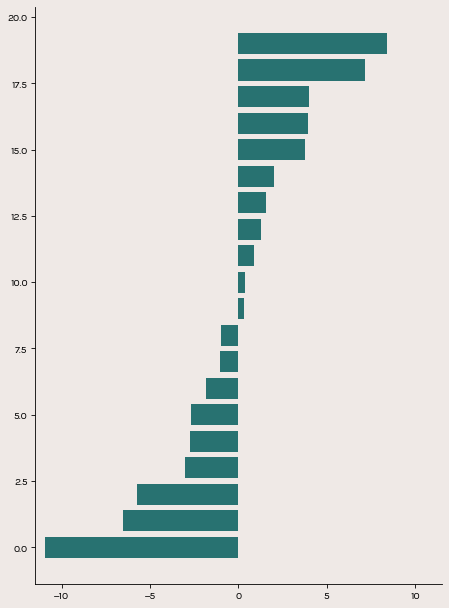

In [16]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# Ensure symmetrical limits on the x-axis
max_ = max(abs(table['difference'].min()), table['difference'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)

ax.barh(table.index, table['difference'])

To make our viz more stylish, we perform the following steps:

. Remove the left spine.
. Add gridlines.
. Style the barchart with hatches.
. Add a black line in the center of the barchart.

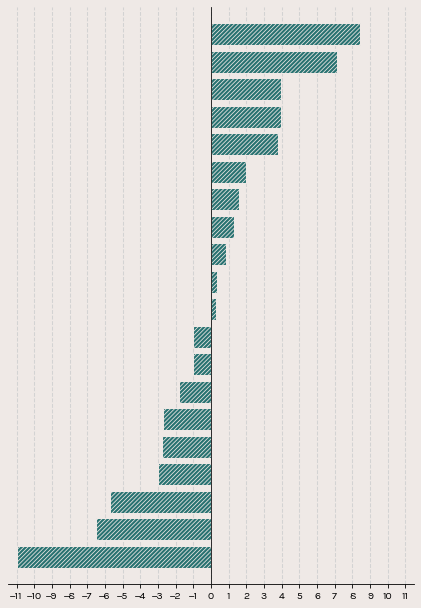

In [18]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(table['difference'].min()), table['difference'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, table.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# -- Bar Chart -------------------------------------
ax.barh(
    table.index, table['difference'],
    hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

Next, we annotate the xG differential to the bar chart.

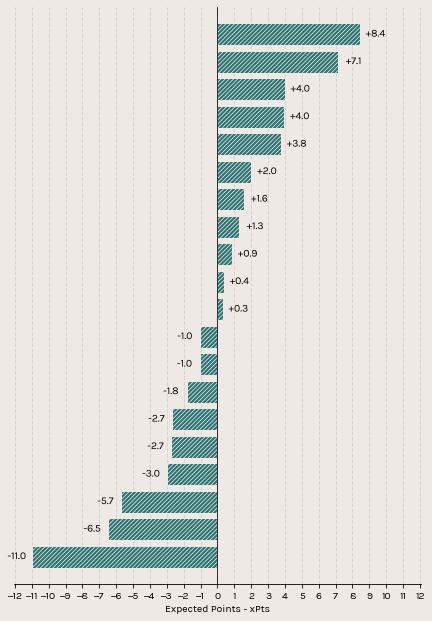

In [22]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(table['difference'].min()), table['difference'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, table.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Expected Points - xPts', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    table.index, table['difference'],
    hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
for index, x in enumerate(table['difference']):
    if x < 0:
        sign_offset = -1
        sign_text = ''
    else:
        sign_offset = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

In [28]:
df1 = pd.read_csv(r'C:\Users\LENOVO\prog_passes_01172023.csv', index_col=0)
df1.head()

,team_name,team_id,pass_area,season,succ,unsucc,succ_rate_22,succ_rate_21,change_in_succ
0,Arsenal,13,Attacking-third,2022_2023,324,277,0.539101,0.504257,0.034844
1,Arsenal,13,Defensive-third,2022_2023,95,201,0.320946,0.290936,0.030010
2,Arsenal,13,Middle-third,2022_2023,289,190,0.603340,0.508353,0.094987
3,Aston Villa,24,Attacking-third,2022_2023,189,285,0.398734,0.437916,-0.039182
4,Aston Villa,24,Defensive-third,2022_2023,141,319,0.306522,0.324147,-0.017625


In [29]:
df1 = df1.groupby(['team_name', 'team_id']).sum().reset_index()
df1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18588\2879362416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df1.groupby(['team_name', 'team_id']).sum().reset_index()


,team_name,team_id,succ,unsucc,succ_rate_22,succ_rate_21,change_in_succ
0,Arsenal,13,708,668,1.463388,1.303546,0.159842
1,Aston Villa,24,587,846,1.220286,1.248413,-0.028127
2,Bournemouth,183,521,699,1.287951,0.000000,0.000000
3,Brentford,189,525,939,1.074310,1.155953,-0.081642
4,Brighton,211,678,735,1.399847,1.239446,0.160401
5,Chelsea,15,606,724,1.328863,1.459902,-0.131039
6,Crystal Palace,162,541,778,1.245444,1.229400,0.016044
7,Everton,31,552,788,1.232230,1.175479,0.056751
8,Fulham,170,555,840,1.183443,0.000000,0.000000
9,Leeds,19,564,816,1.177160,1.155864,0.021296


In [30]:
table

,title,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,npxG,npxGA,deep,deep_allowed,difference
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,21.689648,21.000262,85,120,-10.9638
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,20.097384,28.458781,116,151,-6.5052
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,24.880372,30.817002,121,124,-5.7171
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,19.507667,28.376443,114,140,-3.0124
4,Wolverhampton Wanderers,4,5,11,12,30,17,18.141744,29.549755,19.7441,16.619406,27.266254,110,151,-2.7441
5,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,19.400055,33.500953,98,157,-2.6905
6,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,31.628358,20.158137,176,113,-1.8273
7,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,26.979607,26.644590,110,177,-1.0232
8,Liverpool,8,5,6,34,25,29,39.806331,31.995322,30.0067,39.806331,29.711809,210,125,-1.0067
9,Nottingham Forest,5,6,9,16,35,21,21.543312,33.467369,20.6875,20.020974,29.661531,84,194,0.3125


In [32]:
table['title'] = table['title'].replace({'Wolverhampton Wanderers': 'Wolves', 'Manchester City': 'Man City', 'Manchester United': 'Man Utd','Newcastle United': 'Newcastle'})


In [33]:
table

,title,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,npxG,npxGA,deep,deep_allowed,difference
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,21.689648,21.000262,85,120,-10.9638
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,20.097384,28.458781,116,151,-6.5052
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,24.880372,30.817002,121,124,-5.7171
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,19.507667,28.376443,114,140,-3.0124
4,Wolves,4,5,11,12,30,17,18.141744,29.549755,19.7441,16.619406,27.266254,110,151,-2.7441
5,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,19.400055,33.500953,98,157,-2.6905
6,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,31.628358,20.158137,176,113,-1.8273
7,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,26.979607,26.644590,110,177,-1.0232
8,Liverpool,8,5,6,34,25,29,39.806331,31.995322,30.0067,39.806331,29.711809,210,125,-1.0067
9,Nottingham Forest,5,6,9,16,35,21,21.543312,33.467369,20.6875,20.020974,29.661531,84,194,0.3125


In [34]:
table = table.rename(columns={'title': 'team_name'})


In [35]:
merged_df = pd.merge(table, df1, on='team_name')

In [37]:
merged_df1=merged_df[['team_name','wins','draws','loses','scored','missed','pts','xG','xGA','xpts','team_id','difference']].copy()

In [38]:
merged_df1

,team_name,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,team_id,difference
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,29,-10.9638
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,18,-6.5052
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,19,-5.7171
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,14,-3.0124
4,Wolves,4,5,11,12,30,17,18.141744,29.549755,19.7441,161,-2.7441
5,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,31,-2.6905
6,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,211,-1.8273
7,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,189,-1.0232
8,Liverpool,8,5,6,34,25,29,39.806331,31.995322,30.0067,26,-1.0067
9,Nottingham Forest,5,6,9,16,35,21,21.543312,33.467369,20.6875,174,0.3125


In [57]:
df2 = pd.read_csv(r'C:\Users\LENOVO\team_mapping.csv', index_col=0)
df2

,team_id,fotmob_id
team_name,,
Brentford,189,9937
Tottenham,30,8586
Fulham,170,9879
Crystal Palace,162,9826
Wolves,161,8602
Everton,31,8668
Leicester,14,8197
Newcastle,23,10261
Southampton,18,8466


In [58]:
df2=df2[['fotmob_id']].reset_index()
df2

,team_name,fotmob_id
0,Brentford,9937
1,Tottenham,8586
2,Fulham,9879
3,Crystal Palace,9826
4,Wolves,8602
5,Everton,8668
6,Leicester,8197
7,Newcastle,10261
8,Southampton,8466
9,Brighton,10204


In [65]:
merged_df1 = pd.merge(merged_df1, df2, on='team_name')

In [104]:
merged_df1

,team_name,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,team_id,difference,fotmob_id
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,29,-10.9638,8654
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,18,-6.5052,8466
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,19,-5.7171,8463
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,14,-3.0124,8197
4,Wolves,4,5,11,12,30,17,18.141744,29.549755,19.7441,161,-2.7441,8602
5,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,31,-2.6905,8668
6,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,211,-1.8273,10204
7,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,189,-1.0232,9937
8,Liverpool,8,5,6,34,25,29,39.806331,31.995322,30.0067,26,-1.0067,8650
9,Nottingham Forest,5,6,9,16,35,21,21.543312,33.467369,20.6875,174,0.3125,10203


In [122]:
merged_df1 = merged_df1.sort_values(by='difference').reset_index(drop=True)

In [128]:
merged_df1

,team_name,wins,draws,loses,scored,missed,pts,xG,xGA,xpts,team_id,difference,fotmob_id
0,West Ham,5,3,12,17,25,18,26.256667,23.283759,28.9638,29,-10.9638,8654
1,Southampton,4,3,13,17,35,15,20.946553,29.219950,21.5052,18,-6.5052,8466
2,Leeds,4,6,9,26,33,18,26.402712,32.339328,23.7171,19,-5.7171,8463
3,Leicester,5,3,12,28,35,18,21.029998,29.898783,21.0124,14,-3.0124,8197
4,Wolves,4,5,11,12,30,17,18.141744,29.549755,19.7441,161,-2.7441,8602
5,Everton,3,6,11,15,28,15,20.161227,35.023293,17.6905,31,-2.6905,8668
6,Brighton,9,4,6,37,27,31,33.911872,24.813150,32.8273,211,-1.8273,10204
7,Brentford,7,9,4,32,28,30,30.785427,27.405760,31.0232,189,-1.0232,9937
8,Liverpool,8,5,6,34,25,29,39.806331,31.995322,30.0067,26,-1.0067,8650
9,Nottingham Forest,5,6,9,16,35,21,21.543312,33.467369,20.6875,174,0.3125,10203


In [129]:
print(merged_df1.dtypes)

team_name      object
wins            int64
draws           int64
loses           int64
scored          int64
missed          int64
pts             int64
xG            float64
xGA           float64
xpts          float64
team_id         int64
difference    float64
fotmob_id       int64
dtype: object


In [130]:
def add_logo_on_ax(ax, fotmob_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{fotmob_id:.0f}.png')).convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

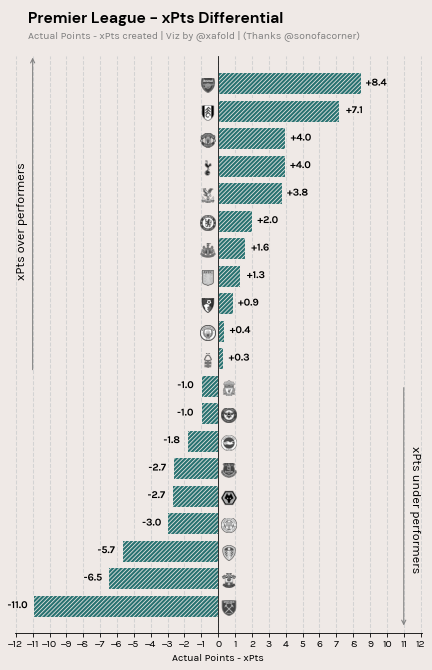

In [145]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(merged_df1['difference'].min()), merged_df1['difference'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, merged_df1.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlabel('Actual Points - xPts', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    merged_df1.index, merged_df1['difference'],
    hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(merged_df1['difference']):
    if x < 0:
        sign_offset = -1
        offset_logo = .15
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = 1.1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    fotmob_id = merged_df1['fotmob_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, fotmob_id, True)
    
# -- Figure title and arrows --------------------------------
position_negative = merged_df1[merged_df1['difference'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='xPts over performers',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='xPts under performers',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.15, y = .92, 
    s = 'Premier League - xPts Differential',
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'black', font = 'DM Sans', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'Actual Points - xPts created | Viz by @xafold | (Thanks @sonofacorner)',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray'
)
plt.savefig(
    "premier_league_xPts.png",
    dpi = 800,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)   

In [126]:
fotmob_id

9825